## Today's Practice Topics
1. ### Data Plotting
2. ### Generating Samples
3. ### Regression (Overfitting, underfitting)
4. ### Data Loading
5. ### Classification

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import sklearn

### Matplotlib Example

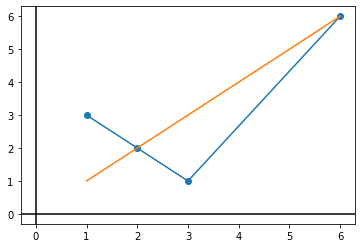

In [18]:
plt.plot([1,2,3, 6], [3,2,1, 6]) # 선 그래프 그림
plt.plot(np.arange(1,7), np.arange(1,7)) # 한번에 여러개의 그림을 그릴 수 있음
plt.scatter([1,2,3, 6], [3,2,1, 6]) # dot을 찍음
plt.axhline(0, color='black') # axis에 대해 horizontal 한 선 : y=0 
plt.axvline(0, color='black') # axis에 대해 vertical한 선 : x=0
plt.show()

In [71]:
def draw_plot(X, Y, x_sample, y_sample):
    for i in range(len(X)):
        plt.plot(X[i], Y[i])
    plt.scatter(x_sample, y_sample)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.axhline(0, color='black')
    plt.axvline(0, color='black')
    plt.show()

### Drawing a function

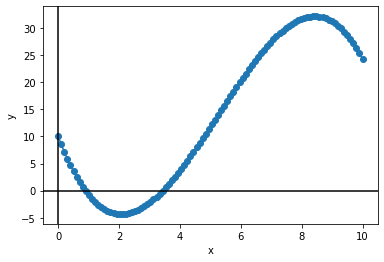

In [25]:
foo = lambda x: -(2/7*x**3-9/2*x**2+15*x-10.)
x_line = np.linspace(0, 10, 100) # 0부터 10 사이에 동일간격 100개의 점들
y_line = foo(x_line)
# Quiz: Draw the function foo using x_line
draw_plot([x_line], [y_line], x_line, y_line)

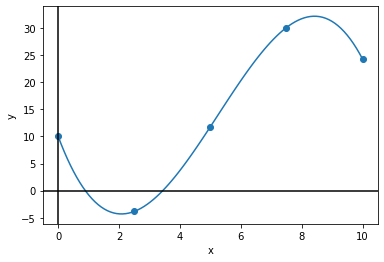

In [28]:
# Quiz: Sample 5 points of foo in the domain [0, 10] and visualize with draw_plot
x_sample = np.linspace(0,10,5)
y_sample = foo(x_sample)

draw_plot([x_line], [y_line], x_sample, y_sample)

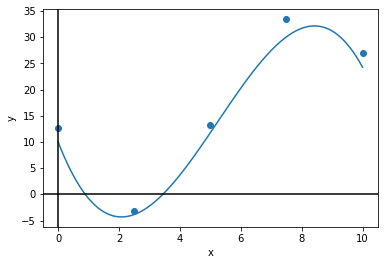

In [40]:
# Quiz: Sample 5 points of foo in the domain [0, 10] with Gaussian noise where mu=0, sigma=0.1 and visualize.
np.random.seed(0)
num_points = 5
x_sample = np.linspace(0,10,num_points)
y_sample = foo(x_sample) + np.random.normal(0,1.5, num_points)

draw_plot([x_line],[y_line], x_sample, y_sample)

### Linear Regression

R^2:0.527995
0.0
[3.52538115]
MSE :  76.87370064238061


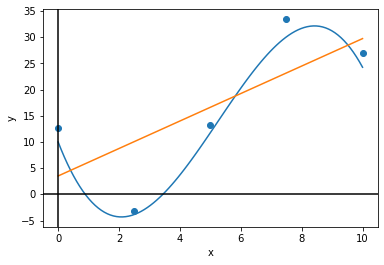

In [56]:
from sklearn.linear_model import LinearRegression

# Defining a linear regression model.
lr = LinearRegression()

# Training the linear regression model.
lr.fit(x_sample[:, None], y_sample) 

# Question) x_sample[:,None]인 이유?
## Answer ) Sample의 차원을 늘려주기 위해서

# Coefficient of Determination (i.e. R^2, R Squared)
r2 = lr.score(x_sample[:, None], y_sample)
print("R^2:%f" % r2)


# Predicting a single data point.
y_hat = lr.predict(x_sample[[0],None])
print(x_sample[0])
print(y_hat)

# Quiz: Calculate Mean Squared Error using x_sample and y_sample and lr.predict()
y_hat = lr.predict(x_sample[:,None])
print(f"MSE : ", ((y_sample - y_hat)**2).mean() )

# Quiz: Use x_line, lr.predict() and draw_plot to visualize the linear regression model,
#       in comparison with the original function foo.
y_lr = lr.predict(x_line[:,None])
draw_plot([x_line, x_line], [y_line, y_lr], x_sample, y_sample)

### Polynomial Regression

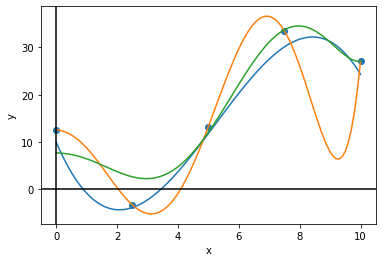

In [73]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

# Defining a polynomial feature transformer.
poly = PolynomialFeatures(degree=6) 

# Transform the original features to polynomial features.
x_sample_poly = poly.fit_transform(x_sample[:, None])
# print(x_sample[:,None])
# print(x_sample_poly)

# Train a linear regression model using the polynomial features.
pr = LinearRegression().fit(x_sample_poly, y_sample)
rr = Ridge(alpha = 30).fit(x_sample_poly, y_sample)

# Quiz: Visualize the polynomial regression model, in comparison with foo.
x_line_poly = poly.fit_transform(x_line[:,None])
y_poly = pr.predict(x_line_poly)
y_ridge = rr.predict(x_line_poly)
draw_plot([x_line, x_line, x_line], [y_line, y_poly, y_ridge], x_sample, y_sample)

# Quiz: What happens if you increase/decrease the degree of the polynomial?
## Degree   ~ 2 : Under Fitting
## Degree 3 ~ 5 : Looking Just fit (4~5 looking ok)
## Degree 6 ~   : Over Fitting => Regularization

### Iris Dataset

In [92]:
data_path = '../../../data/iris.data'
X = []
y = []
with open(data_path, 'r') as fid:
    count = 0
    for line in fid:
        l = line.strip().split(',')
        if len(l) > 1 :
            X.append(l[:4])
            y.append(l[-1])
X = np.array(X)
y = np.array(y)
X.shape, y.shape
# Quiz: Fill the above for loop to load the data into X and y.

((150, 4), (150,))

In [93]:
from sklearn.datasets import load_iris

X,y = load_iris(return_X_y=True)

In [94]:
X.shape, y.shape

((150, 4), (150,))

### Train Test Split

In [95]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

### Classifiers

In [132]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(random_state=1234)
logistic.fit(X_train[:, :2], y_train)

# Quiz: Import Support Vector Machine, then train SVM
from sklearn.svm import SVC
svm = SVC(kernel = 'linear', random_state=1234)
svm.fit(X_train[:, :2], y_train)

# Quiz: Import Decision Tree, then train DT
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth = 6, random_state = 1234)
tree.fit(X_train[:,:2],y_train)

DecisionTreeClassifier(max_depth=6, random_state=1234)

In [133]:
# Quiz: Use the model's predict() to calculate the test accuracy.

logi_hat = logistic.predict(X_test[:,:2])
print((y_test == logi_hat).astype('float').mean())

svm_hat = svm.predict(X_test[:,:2])
print((y_test == svm_hat).astype('float').mean())

dtc_hat = tree.predict(X_test[:,:2])
print((y_test == dtc_hat).astype('float').mean())

0.7333333333333333
0.7333333333333333
0.7


In [129]:
# Quiz: Use various model options, features, and the score() fuction to compare performance.

logistic_full = LogisticRegression(max_iter = 1000, random_state=1234)
logistic_full.fit(X_train, y_train)
y_hat = logistic_full.predict(X_test)
print((y_test == y_hat).astype('float').mean())

svm_full = SVC()
svm_full.fit(X_train,y_train)
y_hat = svm_full.predict(X_test)
print((y_test == y_hat).astype('float').mean())

dtc_full = DecisionTreeClassifier()
dtc_full.fit(X_train,y_train)
y_hat = dtc_full.predict(X_test)
print((y_test == y_hat).astype('float').mean())

1.0
1.0
1.0


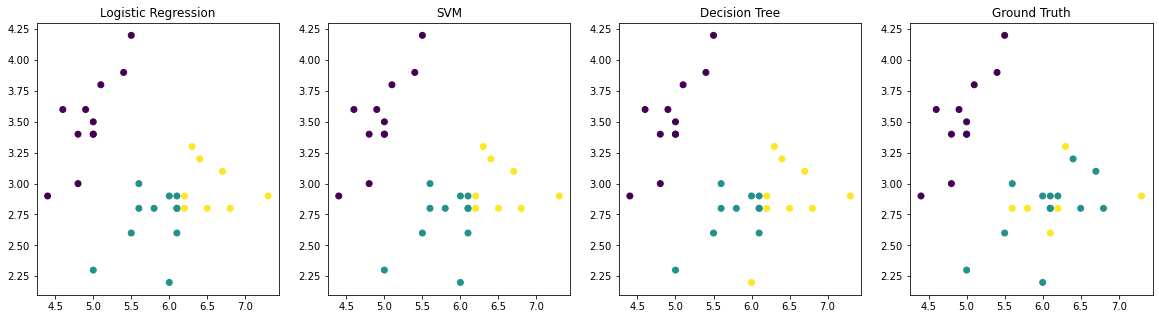

In [134]:
# Quiz: Can you draw four scatterplots for each model's predictions and the true labels? (Example shown below)
plt.figure(figsize=(20,5))

plt.subplot(141)
plt.title('Logistic Regression')
plt.scatter(X_test[:,0], X_test[:,1], c = logi_hat)


plt.subplot(142)
plt.title('SVM')
plt.scatter(X_test[:,0], X_test[:,1], c = svm_hat)

plt.subplot(143)
plt.title('Decision Tree')
plt.scatter(X_test[:,0], X_test[:,1], c = dtc_hat)

plt.subplot(144)
plt.title('Ground Truth')
plt.scatter(X_test[:,0], X_test[:,1], c = y_test)

plt.show()

![Scatterplot](https://i.imgur.com/TDvaIWA.png)